<a href="https://colab.research.google.com/github/diwakarojha/Tensorflow_Keras/blob/main/2_Fashion_MNIS_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Input,Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
import math
tfds.disable_progress_bar()

In [2]:
#!pip install -U tensorflow_datasets

In [3]:
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
datasets,metadata=tfds.load(name='FashionMNIST',as_supervised=True,with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDF302L/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDF302L/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
train_dataset=datasets['train']
test_dataset=datasets['test']

In [6]:
class_names=metadata.features['label'].names
print("Class names:{}".format(class_names))

Class names:['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples

In [8]:
def normalize(images,label):
  images=tf.cast(images,tf.float32)
  images/=255
  return images,label

In [9]:
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)
train_dataset.cache()
test_dataset.cache()

<CacheDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

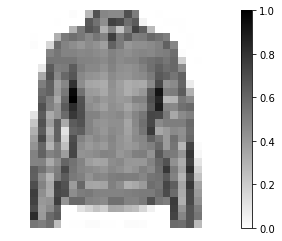

In [10]:
for image,label in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
#plt.grid(b=False)
plt.axis(False)
plt.show()

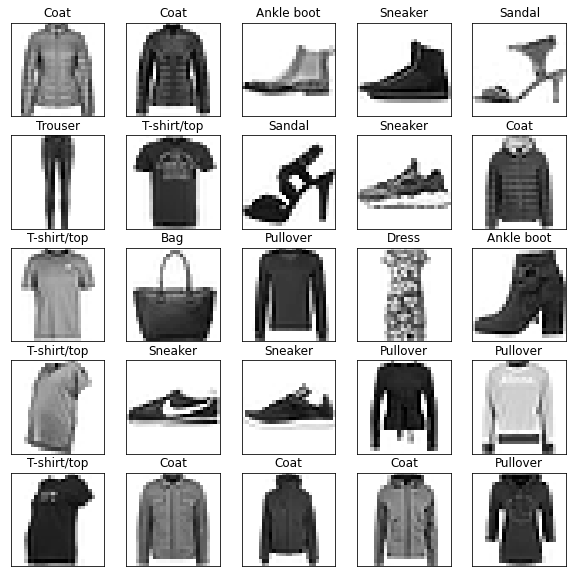

In [11]:
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(test_dataset.take(25)):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.title(class_names[label])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #plt.show()

In [12]:
BATCH_SIZE=32
train_dataset=train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.cache().batch(BATCH_SIZE)

In [18]:
model=tf.keras.models.Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [19]:
history=model.fit(train_dataset,validation_data=(test_dataset),epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4670 - accuracy: 0.8336 - val_loss: 0.4325 - val_accuracy: 0.8414
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3528 - accuracy: 0.8713 - val_loss: 0.4149 - val_accuracy: 0.8467
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8815 - val_loss: 0.3723 - val_accuracy: 0.8628
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3007 - accuracy: 0.8893 - val_loss: 0.3910 - val_accuracy: 0.8559
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8966 - val_loss: 0.3515 - val_accuracy: 0.8754
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9033 - val_loss: 0.3345 - val_accuracy: 0.8832
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2511 - accuracy: 0.9068 - val_loss: 0.3297 - val_accuracy:

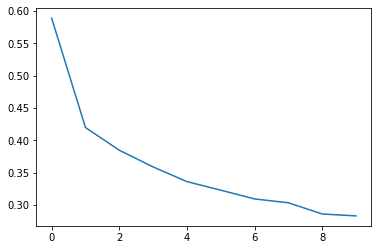

In [17]:
plt.plot(history.history['loss'])

# Break Using Keras data set

In [28]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [24]:
#y_train=to_categorical(y_train,num_classes=10)
#y_test=to_categorical(y_test,num_classes=10)

In [29]:
x_train=x_train/255.0
x_test=x_test/255.0

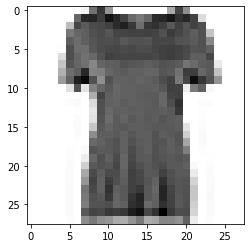

In [30]:
plt.imshow(x_train[10],cmap=plt.cm.binary)

In [31]:
model=tf.keras.models.Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [32]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5933 - accuracy: 0.8029 - val_loss: 0.4727 - val_accuracy: 0.8366
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8538 - val_loss: 0.4284 - val_accuracy: 0.8509
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3851 - accuracy: 0.8663 - val_loss: 0.4030 - val_accuracy: 0.8564
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3598 - accuracy: 0.8748 - val_loss: 0.3865 - val_accuracy: 0.8650
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8797 - val_loss: 0.3824 - val_accuracy: 0.8643
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3252 - accuracy: 0.8847 - val_loss: 0.3682 - val_accuracy: 0.8708
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8880 - val_loss: 0.3585 - val_accuracy:

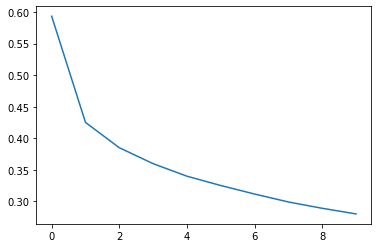

In [33]:
plt.plot(history.history['loss'])

[9 2 1]


array([9, 2, 1])

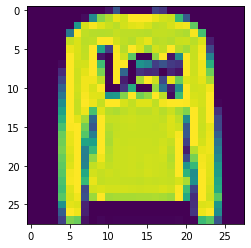

In [37]:
plt.imshow(x_test[1])
print(y_test[0:3])
pred_data=model.predict(x_test[0:3])
np.argmax(pred_data,axis=1)